# Introduction

In [1]:
# Libraries loading
import pandas as pd
import os
from datetime import datetime,timedelta
import warnings
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #statistics for normality and skewness
import numpy as np
ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}
warnings.filterwarnings("ignore")

In [2]:
DATA_DIR='/kaggle/input/atp-and-wta-tennis-data'
df_atp = pd.read_csv(os.path.join(DATA_DIR,"df_atp.csv"),index_col=0)
df_atp["Date"] =df_atp.Date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df_atp.head()

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,...,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,6.0,6,NaN,NaN,NaN,NaN,63,Dosedel S.,2.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,6.0,6,NaN,NaN,NaN,NaN,5,Enqvist T.,2.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,6.0,7,6.0,NaN,NaN,NaN,40,Escude N.,2.0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,6.0,6,NaN,NaN,NaN,NaN,65,Federer R.,2.0
4,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,7.0,5,6.0,NaN,NaN,NaN,81,Fromberg R.,2.0


In [3]:
print("Total number of matches : "+str(len(df_atp)))

Total number of matches : 54908


In [4]:
print(list(df_atp.columns))

['ATP', 'AvgL', 'AvgW', 'B&WL', 'B&WW', 'B365L', 'B365W', 'Best of', 'CBL', 'CBW', 'Comment', 'Court', 'Date', 'EXL', 'EXW', 'GBL', 'GBW', 'IWL', 'IWW', 'L1', 'L2', 'L3', 'L4', 'L5', 'LBL', 'LBW', 'LPts', 'LRank', 'Location', 'Loser', 'Lsets', 'MaxL', 'MaxW', 'PSL', 'PSW', 'Round', 'SBL', 'SBW', 'SJL', 'SJW', 'Series', 'Surface', 'Tournament', 'UBL', 'UBW', 'W1', 'W2', 'W3', 'W4', 'W5', 'WPts', 'WRank', 'Winner', 'Wsets']


We drop the ATP column (Tournament number (men)) because it does seem intuitively unimportant  specially for the prediction phase and it might be even contagious to our model if we forget it in the training phase (Example : it might add some leakage into our model)

In [5]:
#verifying the shape of the dataset before droping the 'ATP' column.
print("Shape of the Dataset before droping the 'ATP' Column : {} ".format(df_atp.shape))

#Saving the column (maybe for later use ?)
df_atp_ID = df_atp['ATP']

#Droping the column 
df_atp.drop("ATP", axis = 1, inplace = True)

#verifying the shape of the dataset after droping the 'ATP' column
print("\nShape of the Dataset after droping the 'ATP' Column : {} ".format(df_atp.shape))

Shape of the Dataset before droping the 'ATP' Column : (54908, 54) 

Shape of the Dataset after droping the 'ATP' Column : (54908, 53) 


## Quick glumpse at the data and answering some questions

** 1.	Who are the three ATP players with the most wins ? **

In [6]:
df_atp['Winner'].describe()

count          54908
unique           976
top       Federer R.
freq            1172
Name: Winner, dtype: object

In [7]:
df_atp['Winner'].value_counts()[0:3]
#Return a Series containing counts of unique values in descending order so that the first element is the most frequently-occurring element.

Federer R.     1172
Nadal R.        943
Djokovic N.     856
Name: Winner, dtype: int64

In [8]:
df_atp['Loser'].describe()

count        54908
unique        1520
top       Lopez F.
freq           430
Name: Loser, dtype: object

In [9]:
df_atp['Loser'].value_counts()[0:3]

Lopez F.       430
Verdasco F.    408
Youzhny M.     401
Name: Loser, dtype: int64

We can see that 'Federer R.' is by far the player with most victories in tournaments being ahead of the second most winner in tournament by 230 matches. While 'Lopez F.' being the player with most losses in Tournaments is only ahead the second most loser one after him with only 14 matches.

Let's see how these 3  player we were talking about have done in both victories and losses.

In [10]:
print("'Federer R.'  have won " + str(len(df_atp[df_atp['Winner']=='Federer R.']) )+" and lost " +str(len(df_atp[df_atp['Loser']=='Federer R.' ])))
print("'Nadal R.'    have won " + str(len(df_atp[df_atp['Winner']=='Nadal R.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Nadal R.' ])))
print("'Djokovic N.' have won " + str(len(df_atp[df_atp['Winner']=='Djokovic N.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Djokovic N.' ])))
print("'Lopez F.'    have won " + str(len(df_atp[df_atp['Winner']=='Lopez F.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Lopez F.' ])))
print("'Youzhny M.'  have won " + str(len(df_atp[df_atp['Winner']=='Youzhny M.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Youzhny M.' ])))
print("'Verdasco F.' have won " + str(len(df_atp[df_atp['Winner']=='Verdasco F.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Verdasco F.' ])))

'Federer R.'  have won 1172 and lost 241
'Nadal R.'    have won 943 and lost 197
'Djokovic N.' have won 856 and lost 174
'Lopez F.'    have won 476 and lost 430
'Youzhny M.'  have won 471 and lost 401
'Verdasco F.' have won 532 and lost 408


We can see that the top 3 performers: 'Federer R.', 'Nadal R.' and 'Djokovic N.' have won many matches but lost at most less than the quarter of that number in matches. While the top player who lost the most matches : 'Lopez F.', 'Youzhny M.' and 'Verdasco F.'  have only won about the same number of matches.

**2.	How many sets did the player “Federer R.” win in total ?** 

In [11]:
df_atp['Lsets']= pd.to_numeric(df_atp['Lsets'], errors='coerce')#tranforming str to numeric values and replcing with nan when we can't
N_sets = df_atp['Wsets'][df_atp['Winner']=='Federer R.'].sum() + df_atp['Lsets'][df_atp['Loser']=='Federer R.'].sum()

print('\nPlayer “Federer R.” won a total of : ' + str(N_sets) + ' sets.\n')


Player “Federer R.” won a total of : 2819.0 sets.



** 3.	How many sets did the player “Federer R.” win during the years 2016 and 2017 ?**

Number of sets the player 'Federer R.' won in 2016 alone:

In [12]:
beg = datetime(2016,1,1)
end = datetime(2017,1,1)
df_atp_2016 = df_atp[(df_atp['Date']>=beg)&(df_atp['Date']<end)]

In [13]:
df_atp_2016['Wsets'][df_atp_2016['Winner']=='Federer R.'].sum() + df_atp_2016['Wsets'][df_atp_2016['Loser']=='Federer R.'].sum()

68.0

Number of sets the player 'Federer R.' won in 2017 alone:

In [14]:
beg = datetime(2017,1,1)
end = datetime(2018,1,1)
df_atp_2017 = df_atp[(df_atp['Date']>=beg)&(df_atp['Date']<end)]

In [15]:
df_atp_2017['Wsets'][df_atp_2017['Winner']=='Federer R.'].sum() + df_atp_2017['Wsets'][df_atp_2017['Loser']=='Federer R.'].sum()

131.0

Number of sets the player 'Federer R.' won during 2016 and 2017: 68+131 = 199 or : 

In [16]:
beg = datetime(2016,1,1)
end = datetime(2018,1,1)
df_atp_2017 = df_atp[(df_atp['Date']>=beg)&(df_atp['Date']<=end)]
df_atp_2017['Wsets'][df_atp_2017['Winner']=='Federer R.'].sum() + df_atp_2017['Wsets'][df_atp_2017['Loser']=='Federer R.'].sum()

199.0

**4.	For each match, what is the percentage of victories of the winner in the past ?**

In [17]:
unique_player_index_and_score = {}
#Dictionary containing the player name as a key and the tuple (player_unique_index,x,y)
#x : number_of_matches_won
#y : number_of_matches played
# x and y are intiated 0 in the bigining but as we go through the data set we increment x and y by 1 if the player wins a match
# or we increment only y with 1 if the player loses a matches
i=0
for player in df_atp['Winner'].unique():
    if player not in unique_player_index_and_score.keys():
        unique_player_index_and_score[player] = (i,0,0)
        i+=1
for player in df_atp['Loser'].unique():
    if player not in unique_player_index_and_score.keys():
        unique_player_index_and_score[player] = (i,0,0)
        i+=1
        
print('Number of unqiue player names : ',i)

Number of unqiue player names :  1521


In [18]:
winner_loser_score_tracking_vector = np.zeros((len(df_atp),2)) 
# two columns one to track the winner percetage and the other for the loser percentage 

In [19]:
#Sorting dataset by date so we can perform our calculation of the player prior win poucentage coorectly by looping one time trough the dataset

In [20]:
df_atp=df_atp.sort_values(by='Date')

In [21]:
for c,row in enumerate(df_atp[['Winner','Loser']].values):
    score_winner = unique_player_index_and_score[row[0]]#Winner up-to date score tracking from the dictionary 
    score_loser = unique_player_index_and_score[row[1]]#Loser up-to date score tracking from the dictionary
    #we consider new player that haven't yet played 5 matches as the have 20% of winning in the past 
    #(kind of a fair approach as they worked hard to get to play in the tournement:))
    if score_winner[2]<5:
        winner_loser_score_tracking_vector[c,0]=0.2
    else:
        winner_loser_score_tracking_vector[c,0] =score_winner[1]/score_winner[2]
    if score_loser[2]<5:
        winner_loser_score_tracking_vector[c,1]=0.2
    else:
        winner_loser_score_tracking_vector[c,1] = score_loser[1]/score_loser[2]
    #updating the dictionary based on the new outcome of the current match
    unique_player_index_and_score[row[0]] = (score_winner[0],score_winner[1]+1,score_winner[2]+1)#Winner
    unique_player_index_and_score[row[1]] = (score_loser[0],score_loser[1],score_loser[2]+1)#loser
    

In [22]:
df_atp['Winner_percentage'] = winner_loser_score_tracking_vector[:,0]
df_atp['Loser_percentage'] = winner_loser_score_tracking_vector[:,1]

In [23]:
df_atp['Winner_percentage'].describe()

count    54908.000000
mean         0.522589
std          0.141856
min          0.000000
25%          0.438017
50%          0.525000
75%          0.610345
max          1.000000
Name: Winner_percentage, dtype: float64

In [24]:
df_atp['Loser_percentage'].describe()

count    54908.000000
mean         0.458873
std          0.136563
min          0.000000
25%          0.380952
50%          0.466216
75%          0.547170
max          1.000000
Name: Loser_percentage, dtype: float64

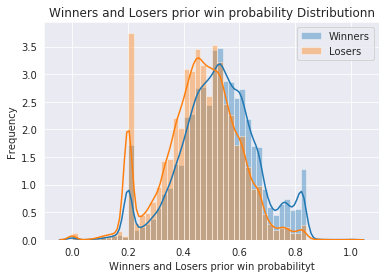

In [25]:
sns.distplot(df_atp['Winner_percentage'], label="Winners")
sns.distplot(df_atp['Loser_percentage'], label="Losers")
plt.ylabel('Frequency')
plt.xlabel('Winners and Losers prior win probabilityt')
plt.title('Winners and Losers prior win probability Distributionn')
plt.legend()

As we say earlier, the are some winner (the top 3 or 4 performers maybe) have a prior win probability that is very high in the range of [0.75,0.82]. We can see also that Winners tend to win and loser tend to lose from the intersection of the two histograms.

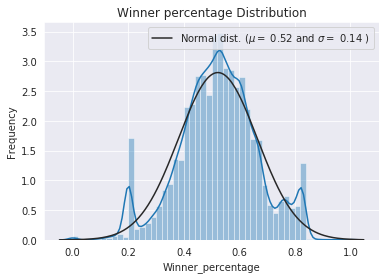

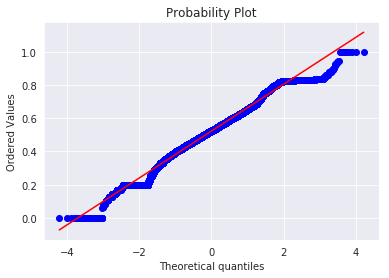

In [26]:
sns.distplot(df_atp['Winner_percentage'] , fit=norm);

#Récupèrer les paramètres ajustés utilisés par la fonction
(mu, sigma) = norm.fit(df_atp['Winner_percentage'])
#Tracer la ditribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Winner percentage Distribution')
fig = plt.figure()
res = stats.probplot(df_atp['Winner_percentage'], plot=plt)

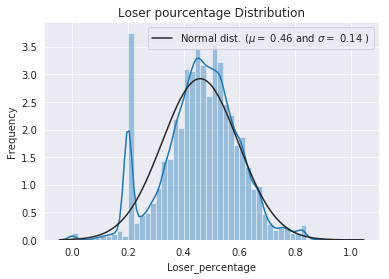

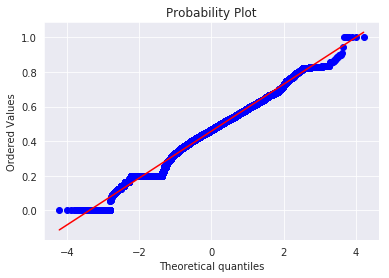

In [27]:
sns.distplot(df_atp['Loser_percentage'] , fit=norm);

#Récupèrer les paramètres ajustés utilisés par la fonction
(mu, sigma) = norm.fit(df_atp['Loser_percentage'])
#Tracer la ditribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Loser pourcentage Distribution')
fig = plt.figure()
res = stats.probplot(df_atp['Loser_percentage'], plot=plt)

the distribution of prior win probability for winner haveextremes values near 0.8  and the ditribution for losers have many values in 0.2 (these are for the playes that have not yet played 5 matches in in tournement in their lifetime). Beside that, both distributions follow an almost normal ditribution Loking at their histogram plot and probability plot expet in the range of 

## Exploratory Data analisys and Data processing:

We'll start by the amount of missing data:

In [28]:
train_na = (df_atp.isnull().sum() / len(df_atp)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Pourcentage of missing values' :train_na})
missing_data

,Pourcentage of missing values
B&WL,98.002113
B&WW,98.002113
L5,96.563342
W5,96.563342
L4,90.901144
W4,90.901144
GBW,90.793691
GBL,90.793691
SBL,90.121658
SBW,90.121658


Text(0.5, 1.0, 'Pourcentage of missing values by variables')

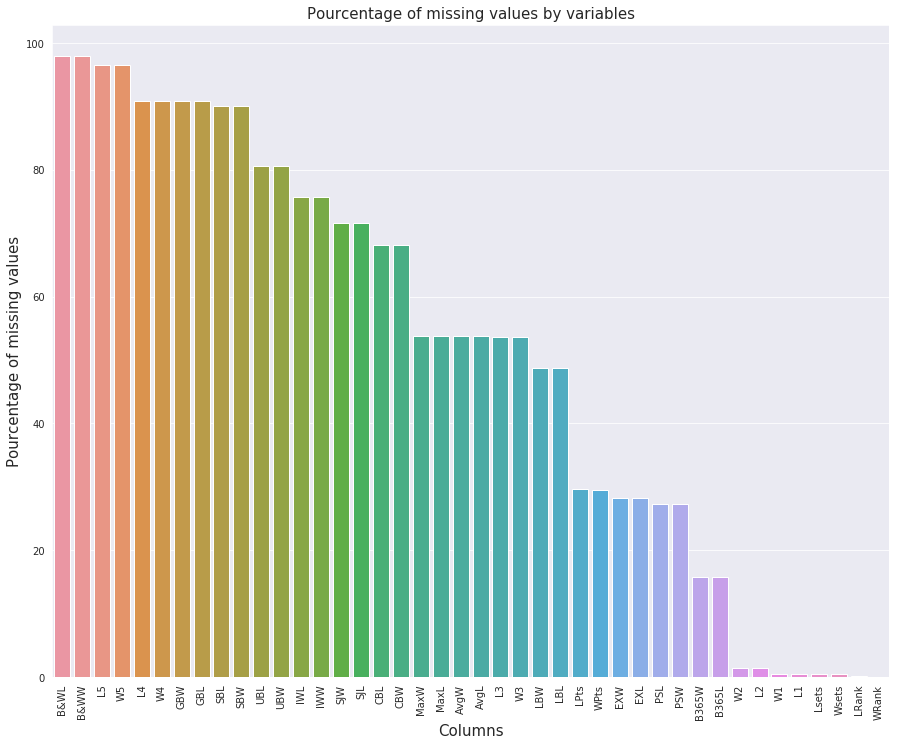

In [29]:
#With a visiualisation:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Pourcentage of missing values', fontsize=15)
plt.title('Pourcentage of missing values by variables', fontsize=15)

Some explications about this missing values:
- Most of the columns with big missing values are from the odds of betting sites: we shall remove all these columns and keep the columns of the three betting sites :  Bet365, EX and PS. First we are going to train a model with data containing these values and also another one with data not containing these values to see its effects on our score. We will be using thoses to also calculate how much we'll win or lose in we used a very simple betting stategy based on the prediction of our model :)

- The columns L5,L4,W4,W5 (Number of games won in 5th\4th set by match winner\loser respectivly) have missing values because some matches have only 'best out of 3sets' rule while some have 'best out of 5sets' rules.
- We can think intuitively that we can't use either the columns L1 trough L5 or W5 trought W1 in our predictive modeling phase training data as those variable are set after the matches finishes and we'll be using a discriminative approach in our modeling. So we'll remove those columns too. We can maybe use them if we want to calculate a modified wining set prior probability of each player (in a more advanced modelisation we can think of predicting those values).

The following columns:

- MaxW= Maximum odds of match winner (as shown by Oddsportal.com)
- MaxL= Maximum odds of match loser (as shown by Oddsportal.com)
- AvgW= Average odds of match winner (as shown by Oddsportal.com)
- AvgL= Average odds of match loser (as shown by Oddsportal.com)

maybe having missing as there are mssing values in some matches from all the betting site ? We shall remove them as more than 60 of these column vlues are missing.

- The columns Lstes and Wsets wich mean Number of sets won by match loser/winner can't be used in as entry data to our model as they are too know after the moatches have finished. But, we we'll keep them to make another variable witch will be the prior probability of winning a sets in the past. We will replace the nan values by mean or median after we explore these columns.

- As for Lrank or WRank columns, I can't imagine another senario as the one of a new player that just got for the first time in the tournements. we will replace those too by mean or median after we explore those columns too.

The same applies to the following columns :

- WPts = ATP Entry points of the match winner as of the start of the tournament
- LPts = ATP Entry points of the match loser as of the start of the tournament


In [30]:
#Drop the columns with missing values and that we won't be using:
for column in train_na.index[:26]:
    df_atp.drop(column, axis = 1, inplace = True)

Text(0.5, 1.0, 'Pourcentage of missing values by variables')

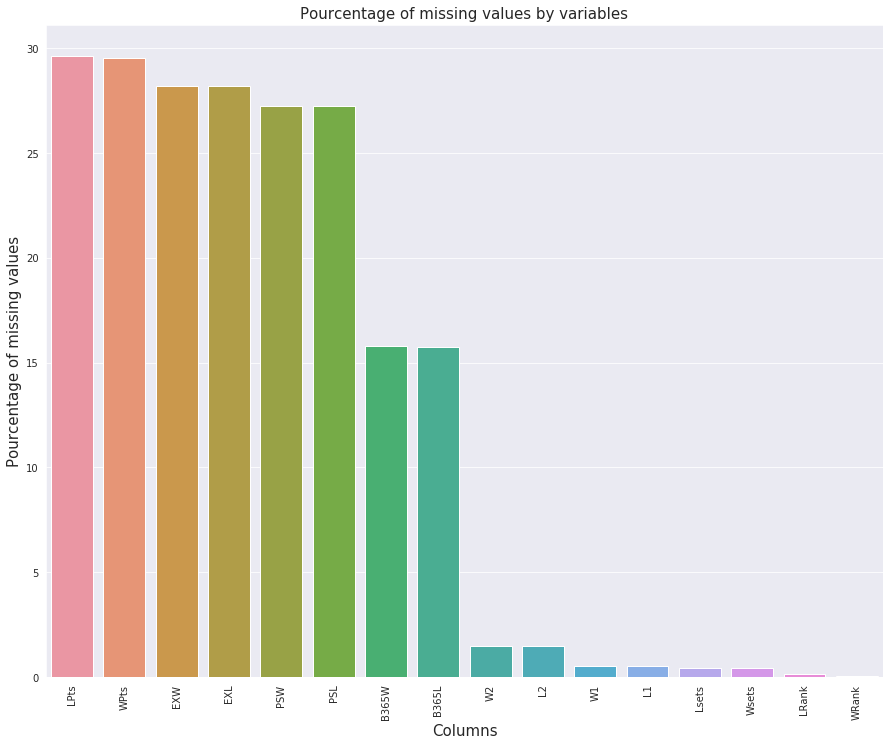

In [31]:
#With a visiualisation:
train_na = (df_atp.isnull().sum() / len(df_atp)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Pourcentage of missing values' :train_na})
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Pourcentage of missing values', fontsize=15)
plt.title('Pourcentage of missing values by variables', fontsize=15)

- We also drop the columns W1,L1,W2,L2 as they are intuitivly useless as explained earlier.


In [32]:
df_atp.drop('W1', axis = 1, inplace = True)
df_atp.drop('L1', axis = 1, inplace = True)
df_atp.drop('W2', axis = 1, inplace = True)
df_atp.drop('L2', axis = 1, inplace = True)

Let"s explore the remaining columns to see what the best possible values to replace the nan values.

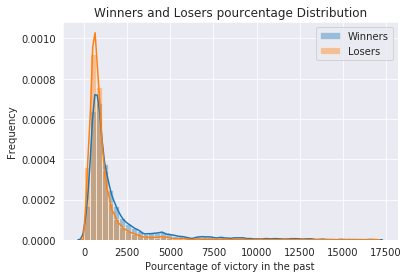

In [33]:
sns.distplot(df_atp['WPts'].dropna(), label="Winners")
sns.distplot(df_atp['LPts'].dropna(), label="Losers")
plt.ylabel('Frequency')
plt.xlabel('Pourcentage of victory in the past')
plt.title('Winners and Losers pourcentage Distribution')
plt.legend()

seems legit to replace it by mode

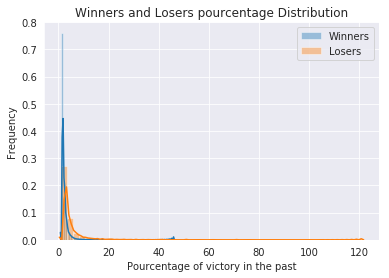

In [34]:
sns.distplot(df_atp['PSW'].dropna(), label="Winners")
sns.distplot(df_atp['PSL'].dropna(), label="Losers")
plt.ylabel('Frequency')
plt.xlabel('Pourcentage of victory in the past')
plt.title('Winners and Losers pourcentage Distribution')
plt.legend()

also mode

In [35]:
df_atp['EXW']= pd.to_numeric(df_atp['EXW'], errors='coerce')

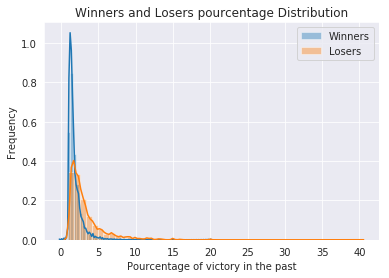

In [36]:
df_atp['EXW']= pd.to_numeric(df_atp['EXW'], errors='coerce')
sns.distplot(df_atp['EXW'].dropna(), label="Winners")
sns.distplot(df_atp['EXL'].dropna(), label="Losers")
plt.ylabel('Frequency')
plt.xlabel('Pourcentage of victory in the past')
plt.title('Winners and Losers pourcentage Distribution')
plt.legend()

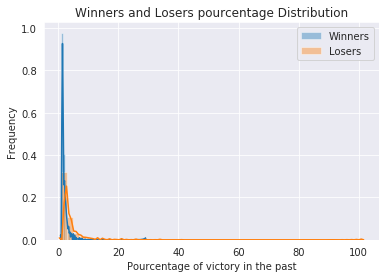

In [37]:
df_atp['B365W']= pd.to_numeric(df_atp['B365W'], errors='coerce')
sns.distplot(df_atp['B365W'].dropna(), label="Winners")
sns.distplot(df_atp['B365L'].dropna(), label="Losers")
plt.ylabel('Frequency')
plt.xlabel('Pourcentage of victory in the past')
plt.title('Winners and Losers pourcentage Distribution')
plt.legend()

also mode

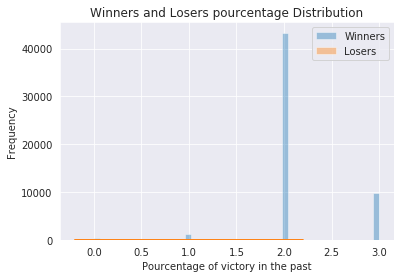

In [38]:
df_atp['Wsets']=pd.to_numeric(df_atp['Wsets'],errors='coerce' )
#df_atp['Lsets']=pd.to_numeric(df_atp['Lsets'],errors='coerce')
#df_atp['Wsets'].replace('scott', np.nan, inplace=True)
sns.distplot(df_atp['Wsets'].dropna(), label="Winners",kde=False)
sns.distplot(df_atp['Lsets'].dropna(), label="Losers")
plt.ylabel('Frequency')
plt.xlabel('Pourcentage of victory in the past')
plt.title('Winners and Losers pourcentage Distribution')
plt.legend()

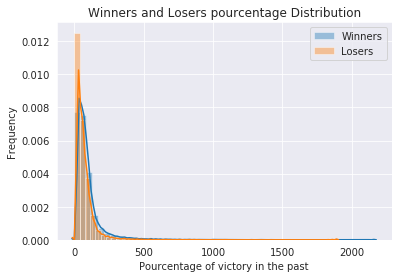

In [39]:
df_atp['LRank']=pd.to_numeric(df_atp['LRank'],errors='coerce' )
df_atp['WRank']=pd.to_numeric(df_atp['WRank'],errors='coerce' )
sns.distplot(df_atp['LRank'].dropna(), label="Winners")
sns.distplot(df_atp['WRank'].dropna(), label="Losers")
plt.ylabel('Frequency')
plt.xlabel('Pourcentage of victory in the past')
plt.title('Winners and Losers pourcentage Distribution')
plt.legend()

replacring the value by the mode or mean then plotting poucentage of missing again.

In [40]:
columns=['WPts','LPts','PSW','PSL','EXW','EXL','B365W','B365L','Lsets','Wsets','LRank','WRank']
for column in columns:
    df_atp[column]=df_atp[column].fillna(float(df_atp[column].mode()[0]))

In [41]:
train_na = (df_atp.isnull().sum() / len(df_atp)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Pourcentage of missing values' :train_na})
missing_data
#No more missing values

,Pourcentage of missing values


## More data processing for our datasets so we can use it for prediction and EDA

In [42]:
df_atp.columns

Index(['B365L', 'B365W', 'Best of', 'Comment', 'Court', 'Date', 'EXL', 'EXW',
       'LPts', 'LRank', 'Location', 'Loser', 'Lsets', 'PSL', 'PSW', 'Round',
       'Series', 'Surface', 'Tournament', 'WPts', 'WRank', 'Winner', 'Wsets',
       'Winner_percentage', 'Loser_percentage'],
      dtype='object')

Description of the rest of the Data:
- 'B365L', 'B365W','EXL', 'EXW','PSL', 'PSW' : Just betting odds for wiiner and loser repsctivly.
- 'Bestof' : Maximum number of sets playable in match.
- 'Comment' :Comment on the match (Completed, won through retirement of loser, or via Walkover)
- 'Court' :  Type of court (outdoors or indoors)
- 'Date' : date of the match obviously.
- 'WPts','LPts' : ATP Entry points of the match winner/loser as of the start of the tournament repectivly.
- 'Location' : Venue of tournament.
- 'Winner','Loser' :  Name of winner/loser respectively.
- 'Wsets','Lsets' : Number of sets won by match winner/loser respectively
- 'Round' : Round of match
- 'Series' : Name of ATP tennis series (Grand Slam, Masters, International or International Gold)
- 'Surface' : Type of surface (clay, hard, carpet or grass)
- 'Tournament' : me of tounament (including sponsor if relevant)
- 'WRank','LRank' : ATP Entry ranking of the match winner/loser respectively as of the start of the tournament
- 'Winner_percentage','Loser_percentage': ...

As we said earlier, the column 'B365L', 'B365W','EXL', 'EXW','PSL', 'PSW' will be used in a our modelisationat first and we develop also the same models without those columns. We can think of these columns as some already calculated features given to us by the betting company.

- The 'comment' column is an event that happend after the matches is finisehd so we'll not be using it too.

- 'Wsets' and 'Lsets' columns are that reprensents events that happens after the matche is finnished so we'll not be usig it in our model but we'll make of it a new column that reprensets the winner/loser percentage of winning a sets in the past.

- All the rest of the columns will be used except maybe fot the tournement name and Location that we'll need to explore them first to see.

In [43]:
df_atp.drop("Comment", axis = 1, inplace = True)

In [44]:
df_atp.Tournament.describe()

count           54908
unique            222
top       French Open
freq             2540
Name: Tournament, dtype: object

In [45]:
df_atp.Location.describe()

count     54908
unique      117
top       Paris
freq       3480
Name: Location, dtype: object

In [46]:
len(df_atp)

54908

Both columns have only 214,115 unique in a 52298 Data set. thinking about also removing the 2018 and 2017 matches (the later for the tests) and using a cross validation function. I'm not sure if they have any predcitve power seing the few samples for each class. but we'll be keeping them as predictive variables.

In [47]:
df_atp.describe()

,B365L,B365W,Best of,EXL,EXW,LPts,LRank,Lsets,PSL,PSW,WPts,WRank,Wsets,Winner_percentage,Loser_percentage
count,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000,54908.000000
mean,3.407003,1.757871,3.373133,3.004813,1.674772,1014.885427,91.446547,0.407063,3.611418,1.777992,1554.464158,59.054400,2.142329,0.522589,0.458873
std,3.229277,1.012382,0.779134,2.115683,0.837634,1019.140067,115.407968,0.557489,4.750113,1.149294,1959.624550,72.914142,0.458262,0.141856,0.136563
min,1.002000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.010000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.830000,1.280000,3.000000,2.000000,1.350000,601.000000,35.000000,0.000000,2.110000,1.370000,785.000000,17.000000,2.000000,0.438017,0.380952
50%,2.750000,1.400000,3.000000,2.350000,1.350000,920.000000,65.000000,0.000000,2.200000,1.380000,900.000000,42.000000,2.000000,0.525000,0.466216
75%,3.500000,1.833000,3.000000,3.100000,1.750000,930.000000,104.000000,1.000000,3.410000,1.810000,1396.000000,77.000000,2.000000,0.610345,0.547170
max,101.000000,29.000000,5.000000,40.000000,20.000000,16950.000000,2159.000000,2.000000,121.000000,46.000000,16950.000000,1890.000000,3.000000,1.000000,1.000000


###### Calculating the player prior win set probability : 

In [48]:
#winner prior sets winns pourcentage column
unique_player_index_and_score = {}
#Dictionary containing the player name as a key and the tuple (player_unique_index,x,y)
#x : number_of_set_won
#y : number_of_sets_played
# x and y are intiated 0 in the bigining but as we go through the data set we increment x Wsets(or Lsets) witch are the number of
# won by matches winner(orloser) and we increment y by Wsets+Lsets wich is the number of stes played in that match
i=0
for player in df_atp['Winner'].unique():
    if player not in unique_player_index_and_score.keys():
        unique_player_index_and_score[player] = (i,0,0)
        i+=1
for player in df_atp['Loser'].unique():
    if player not in unique_player_index_and_score.keys():
        unique_player_index_and_score[player] = (i,0,0)
        i+=1
        
print('Number of unqiue player names : ',i)
winner_loser_score_tracking_vector = np.zeros((len(df_atp),2)) 
# two columns one to track the winner percetage and the other for the loser percentage 
df_atp=df_atp.sort_values(by='Date')
for i in range(len(df_atp)):
    row=[df_atp.Winner[i],df_atp.Loser[i]]
    score_winner = unique_player_index_and_score[row[0]]#Winner up-to date set win score tracking from the dictionary 
    score_loser = unique_player_index_and_score[row[1]]#Loser up-to date  set win score tracking from the dictionary
    #we consider new player that haven't yet had 15 sets yet as they had a 20% of winning in the past 
    #(kind of a fair optimist approach as the worked hard to get to play in the tournement:))
    if int(score_winner[2])<15:
        winner_loser_score_tracking_vector[i,0]=0.2
    else:
        winner_loser_score_tracking_vector[i,0] =score_winner[1]/score_winner[2]
    if score_loser[2]<15:
        winner_loser_score_tracking_vector[i,1]=0.2
    else:
        winner_loser_score_tracking_vector[i,1] = score_loser[1]/score_loser[2]
    #updating the dictionary based on the new outcome of the current match
    unique_player_index_and_score[row[0]] = (score_winner[0],score_winner[1]+float(df_atp.Wsets[i]),score_winner[2]+float(df_atp.Wsets[i]+df_atp.Lsets[i]))#Winner
    unique_player_index_and_score[row[1]] = (score_loser[0],score_loser[1]+float(df_atp.Lsets[i]),score_loser[2]+float(df_atp.Wsets[i]+df_atp.Lsets[i]))#loser
    
df_atp['Winner_set_percentage'] = winner_loser_score_tracking_vector[:,0]
df_atp['Loser_set_percentage'] = winner_loser_score_tracking_vector[:,1]


Number of unqiue player names :  1521


In [49]:
df_atp['Winner_set_percentage'].describe()

count    54908.000000
mean         0.512981
std          0.117101
min          0.040000
25%          0.448202
50%          0.516484
75%          0.582500
max          0.937500
Name: Winner_set_percentage, dtype: float64

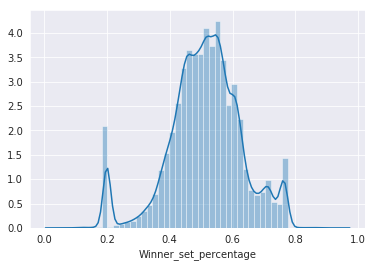

In [50]:
sns.distplot(df_atp['Winner_set_percentage'])

In [51]:
df_atp['Loser_set_percentage'].describe()

count    54908.000000
mean         0.460213
std          0.116021
min          0.000000
25%          0.405063
50%          0.468571
75%          0.535308
max          0.878788
Name: Loser_set_percentage, dtype: float64

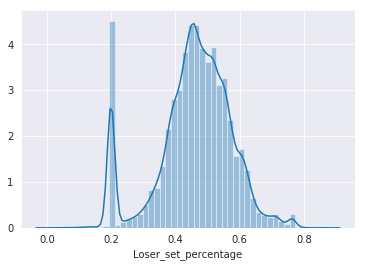

In [52]:
sns.distplot(df_atp['Loser_set_percentage'])

Again we can remark that winners tend to win and loser tend to lose.

###### Calculating the Elo ranking features : 

The Elo rating system is a method for calculating the relative skill levels of players in zero-sum games such as chess. It is named after its creator Arpad Elo, a Hungarian-American physics professor.

The difference in the ratings between two players serves as a predictor of the outcome of a match. Two players with equal ratings who play against each other are expected to score an equal number of wins. A player whose rating is 100 points greater than their opponent's is expected to score 64%; if the difference is 200 points, then the expected score for the stronger player is 76%.

In [53]:
#Not mine, I took from the internet But i got a full understanding of it :)
def compute_elo_rankings(data):
    """
    Given the list on matches in chronological order, for each match, computes 
    the elo ranking of the 2 players at the beginning of the match
    
    """
    print("Elo rankings computing...")
    players=list(pd.Series(list(data.Winner)+list(data.Loser)).value_counts().index)
    elo=pd.Series(np.ones(len(players))*1500,index=players)
    ranking_elo=[(1500,1500)]
    for i in range(1,len(data)):
        w=data.iloc[i-1,:].Winner
        l=data.iloc[i-1,:].Loser
        elow=elo[w]
        elol=elo[l]
        pwin=1 / (1 + 10 ** ((elol - elow) / 400))    
        K_win=32
        K_los=32
        new_elow=elow+K_win*(1-pwin)
        new_elol=elol-K_los*(1-pwin)
        elo[w]=new_elow
        elo[l]=new_elol
        ranking_elo.append((elo[data.iloc[i,:].Winner],elo[data.iloc[i,:].Loser])) 
        if i%5000==0:
            print(str(i)+" matches computed...")
    ranking_elo=pd.DataFrame(ranking_elo,columns=["elo_winner","elo_loser"])    
    ranking_elo["proba_elo"]=1 / (1 + 10 ** ((ranking_elo["elo_loser"] - ranking_elo["elo_winner"]) / 400))   
    return ranking_elo

In [54]:
Elo =  compute_elo_rankings(df_atp)

Elo rankings computing...
5000 matches computed...
10000 matches computed...
15000 matches computed...
20000 matches computed...
25000 matches computed...
30000 matches computed...
35000 matches computed...
40000 matches computed...
45000 matches computed...
50000 matches computed...


In [55]:
df_atp["Elo_Winner"] = Elo["elo_winner"]
df_atp["Elo_Loser"] = Elo["elo_loser"]
df_atp["Proba_Elo"]= Elo["proba_elo"]

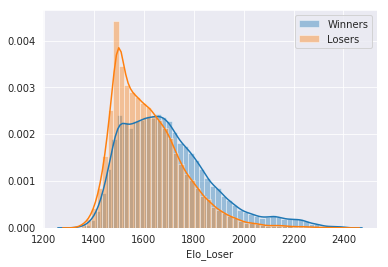

In [56]:
sns.distplot(df_atp["Elo_Winner"], label="Winners")
sns.distplot(df_atp["Elo_Loser"], label="Losers")
plt.legend()

again winners tend to win biger elo rating and loser tend to have a smaller one.

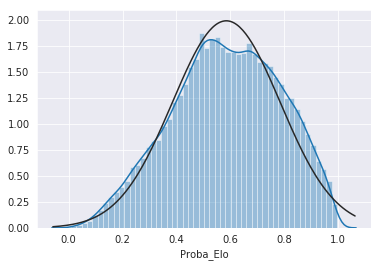

In [57]:
sns.distplot(df_atp["Proba_Elo"],fit=norm)

Our distribution of probability is little skewwed trough the right.

One last transformation of our data to augmented it and in the mean time to make it ready for modelisation and to explore it more too.

-For each row describing a match we'll be having two resulting row. One with target variable 1 and we keep the columns as they are and one with the target variable 0 we put the invert the column of the wiinner with that of the loser and the column of the loser with that the wiinner and we keep the rest of the columsn as they are. That will double the amount of our traning data and will also transform our problem to a binary classification problem.

In [58]:
target_1 = np.ones(len(df_atp))
target_2 = np.zeros(len(df_atp))
target_1 = pd.DataFrame(target_1,columns=['label'])
target_2 = pd.DataFrame(target_2,columns=['label'])

In [59]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
print(df_atp.columns)

Index(['B365L', 'B365W', 'Best of', 'Court', 'Date', 'EXL', 'EXW', 'LPts',
       'LRank', 'Location', 'Loser', 'Lsets', 'PSL', 'PSW', 'Round', 'Series',
       'Surface', 'Tournament', 'WPts', 'WRank', 'Winner', 'Wsets',
       'Winner_percentage', 'Loser_percentage', 'Winner_set_percentage',
       'Loser_set_percentage', 'Elo_Winner', 'Elo_Loser', 'Proba_Elo'],
      dtype='object')


In [60]:
features_categorical = df_atp[["Series","Court","Surface","Round","Best of","Tournament"]].copy()
features_onehot = pd.get_dummies(features_categorical)
#tournaments_encoded = features_tournaments_encoding(df_atp)
#features_binary = pd.concat([features_categorical_encoded,tournaments_encoded],1)

## For the moment we have one row per match. 
## We "duplicate" each row to have one row for each outcome of each match. 
## Of course it isn't a simple duplication of  each row, we need to "invert" some features

# Elo data
elo_rankings = df_atp[["Elo_Winner","Elo_Loser","Proba_Elo"]]
elo_1 = elo_rankings
elo_2 = elo_1[["Elo_Loser","Elo_Winner","Proba_Elo"]]
elo_2.columns = ["Elo_Winner","Elo_Loser","Proba_Elo"]
elo_2.Proba_Elo = 1-elo_2.Proba_Elo
# Player prior win probability
win_pourcentage = df_atp[['Winner_percentage', 'Loser_percentage']]
win_1 = win_pourcentage
win_2 = win_1[['Loser_percentage','Winner_percentage']]
win_2.columns = ['Winner_percentage', 'Loser_percentage']
# Player prior win set probability
set_win_pourcentage = df_atp[['Winner_set_percentage','Loser_set_percentage']]
set_1 = set_win_pourcentage
set_2 = set_1[['Loser_set_percentage','Winner_set_percentage']]
set_2.columns = ['Winner_set_percentage','Loser_set_percentage']
# Player entry points
Pts = df_atp[['WPts','LPts']]
Pts_1 = Pts
Pts_2 = Pts_1[['LPts','WPts']]
Pts_2.columns = ['WPts','LPts']
# Player Entry Ranking
Rank = df_atp[['WRank','LRank']]
Rank_1 = Rank
Rank_2 = Rank_1[['LRank','WRank']]
Rank_2.columns = ['LRank','WRank']
#Player Odds for winning
Odds = df_atp[['EXW','EXL','PSW','PSL','B365W','B365L']]
Odds_1 = Odds
Odds_2 = Odds_1[['EXL','EXW','PSL','PSW','B365L','B365W']]
Odds_2.columns = ['EXW','EXL','PSW','PSL','B365W','B365L']
#Date 
Date_1 = df_atp.Date
Date_2 = df_atp.Date
elo_2.index = range(1,2*len(elo_1),2)
elo_1.index = range(0,2*len(elo_1),2)
win_1.index = range(0,2*len(win_1),2)
win_2.index = range(0,2*len(win_1),2)
set_1.index = range(0,2*len(set_1),2)
set_2.index = range(0,2*len(set_1),2)
Pts_1.index = range(0,2*len(Pts_1),2)
Pts_2.index = range(0,2*len(Pts_1),2)
Rank_1.index = range(0,2*len(Rank_1),2)
Rank_2.index = range(0,2*len(Rank_1),2)
Odds_1.index = range(0,2*len(Odds_1),2)
Odds_2.index = range(0,2*len(Odds_1),2)
Date_1.index = range(0,2*len(Date_1),2)
Date_2.index = range(0,2*len(Date_1),2)
target_1.index = range(0,2*len(target_1),2)
target_2.index = range(0,2*len(target_1),2)
features_elo_ranking = pd.concat([elo_1,elo_2]).sort_index(kind='merge')
features_win_pourcentage = pd.concat([win_1,win_2]).sort_index(kind='merge')
features_set_pourcentage = pd.concat([set_1,set_2]).sort_index(kind='merge')
features_Pts = pd.concat([Pts_1,Pts_2]).sort_index(kind='merge')
features_Rank =  pd.concat([Rank_1,Rank_2]).sort_index(kind='merge')
features_Odds = pd.concat([Odds_1,Odds_2]).sort_index(kind='merge')
target = pd.concat([target_1,target_2]).sort_index(kind='merge')
Date = pd.concat([Date_1,Date_2]).sort_index(kind='merge').to_frame()
'''
features_Odds.reset_index(drop=True, inplace=True)
features_elo_ranking.reset_index(drop=True, inplace=True)
#features_onehot.reset_index(drop=True, inplace=True)
features_win_pourcentage.reset_index(drop=True, inplace=True)
features_set_pourcentage.reset_index(drop=True, inplace=True)
features_set_pourcentage.reset_index(drop=True, inplace=True)
features_Pts.reset_index(drop=True, inplace=True)
features_Rank.reset_index(drop=True, inplace=True)
features_Odds.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)
'''
features_onehot = pd.DataFrame(np.repeat(features_onehot.values,2, axis=0),columns=features_onehot.columns)
features_onehot.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
features_Odds.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
features_elo_ranking.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
features_win_pourcentage.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
features_set_pourcentage.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
features_Pts.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
features_Rank.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
features_Odds.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
target.set_index(pd.Series(range(0,2*len(df_atp))), inplace=True)
Date.set_index(pd.Series(range(0,2*len(df_atp))),inplace=True)
### Building of the pre final dataset 
# We can remove some features to see the effect on our model
features = pd.concat([features_win_pourcentage,
                  features_set_pourcentage,
                  features_elo_ranking,
                  features_Pts,
                  features_Rank,
                  features_Odds,
                  features_onehot,
                  Date,
                  target],1)



In [61]:
#Setting the 2019 matches as the test dataset.
#beg = datetime(2016,1,1)
end_train = datetime(2019,1,1)
beg_test = datetime(2019,1,1)
end_test = datetime(2020,1,1)
train = features[features['Date']<end_train]
test = features[(features['Date']>=beg_test)&(features['Date']<end_test)]

In [62]:
#For saving the features
#features.to_csv("df_atp_features.csv",index=False)

In [63]:
#loading after saveing
#features = pd.read_csv('df_atp_features.csv')

In [64]:
print(len(train))
print(len(test))

104630
5186


# Modeling

Let's see what might be our most important Features at first try. .

Text(0.5, 0, 'Relevance Percentage')

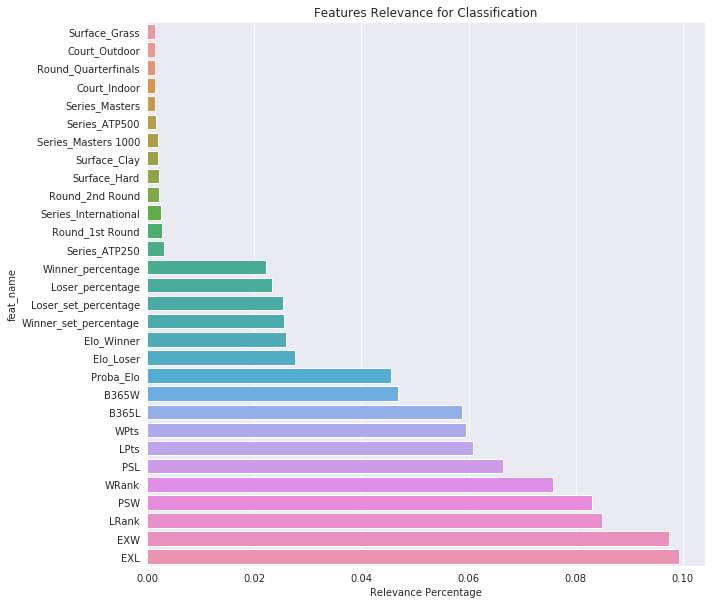

In [65]:
from sklearn.ensemble import RandomForestClassifier
df = features.drop(columns=['Date','label'])
feat_forest = RandomForestClassifier(n_jobs=-1)
feat_forest.fit(X=df, y=features['label'])

plt.figure(figsize=(10, 10))
feat_imp = feat_forest.feature_importances_

feat_imp, cols = zip(*sorted(zip(feat_imp, df.columns)))
feat_imp = np.array(feat_imp)[-30:]
cols = np.array(cols)[-30:]
d = {'feat_name': cols
    ,'feat_imp': feat_imp }
importance =  pd.DataFrame(data=d)
sns.barplot( x=  importance['feat_imp'],y = importance['feat_name']
           );
plt.yticks(range(len(cols[-30:])), cols[-30:])
plt.title("Features Relevance for Classification")
plt.xlabel("Relevance Percentage")

I will try to build models that are not relying on betting odds,because I've tested models relying on betting odds and the performance were great almost 98% for the best model. Let's remove those columns from the train and test set and see what we'll get; the concerned columns that needs to be removed are : 'EXW','EXL','PSW','PSL','B365W' and 'B365L'

## Modeling and performance evaluation:

We will use a StratifiedKFold as our cross validation strategy(with k=10) to evaluate our models performance on the training phase. After that, we assess our models on the testing data as well and see if those score are signitifictly closer to each other or that we're over-fiting.

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split,StratifiedKFold

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
# We will be using the accuracy, precision,recall and the f1  as scores to asses our model performence
#Importing most important alogorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC#we will not be using SVM due tot he huge training time required on our dataset.
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

from sklearn import model_selection #Cross-validation multiple scoring function

#features.drop(Odds_1.columns,axis=1,inplace=True)
X = train.drop(columns=['Date','label','EXW', 'EXL', 'PSW', 'PSL', 'B365W', 'B365L'])
Y = train['label']
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(5, n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier(max_depth=10)))
models.append(('NB', GaussianNB()))
#models.append(('SVM_linear', SVC(kernel="linear", C=0.025)))
#models.append(('SVM_',SVC(gamma=2, C=1)))
models.append(('RandomForest',RandomForestClassifier( n_estimators=100, n_jobs=-1)))
models.append(('MLP',MLPClassifier(alpha=0.0001)))
models.append(('ADABoost',AdaBoostClassifier()))

# evaluate each model in turn

results = []
scoring = {'accuracy': make_scorer(accuracy_score),
          'precision_score': make_scorer(precision_score),
          'recall_score' : make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)}
names = []
for name, model in models:
    stratifiedKFold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_validate(model, X, Y, cv=stratifiedKFold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg ='-------------------------------------------------------------------------------------------------------------\n'
    msg = "Model : %s \n" % (name)
    msg = msg +'\n'
    msg =  msg + "Accuracy :  %f (%f)\n" % (cv_results['test_accuracy'].mean(),cv_results['test_accuracy'].std())
    msg =  msg + "Precision score :  %f (%f)\n" % (cv_results['test_precision_score'].mean(),cv_results['test_precision_score'].std())
    msg =  msg + "Recall score :  %f (%f)\n" % (cv_results['test_recall_score'].mean(),cv_results['test_recall_score'].std())
    msg =  msg + "F1 score :  %f (%f)\n" % (cv_results['test_f1_score'].mean(),cv_results['test_f1_score'].std())
    msg = msg + '------------------------------------------------------------------------------------------------------------\n'
    print(msg)

Model : LR 

Accuracy :  0.720749 (0.042054)
Precision score :  0.720625 (0.042003)
Recall score :  0.721038 (0.042043)
F1 score :  0.720831 (0.042021)
------------------------------------------------------------------------------------------------------------

Model : LDA 

Accuracy :  0.734789 (0.033268)
Precision score :  0.734812 (0.033239)
Recall score :  0.734743 (0.033280)
F1 score :  0.734778 (0.033259)
------------------------------------------------------------------------------------------------------------

Model : QDA 

Accuracy :  0.524697 (0.021138)
Precision score :  0.567369 (0.066182)
Recall score :  0.494614 (0.352017)
F1 score :  0.441958 (0.186523)
------------------------------------------------------------------------------------------------------------

Model : KNN 

Accuracy :  0.886333 (0.049008)
Precision score :  0.886337 (0.049015)
Recall score :  0.886320 (0.049014)
F1 score :  0.886328 (0.049015)
-----------------------------------------------------------

In [68]:
Accuracy = []
Precision = []
Recall = []
F1 = []
for idx,scores in enumerate(results):
    Accuracy.append(scores['test_accuracy'])
    Precision.append(scores['test_precision_score'])
    Recall.append(scores['test_recall_score'])
    F1.append(scores['test_f1_score'])
    

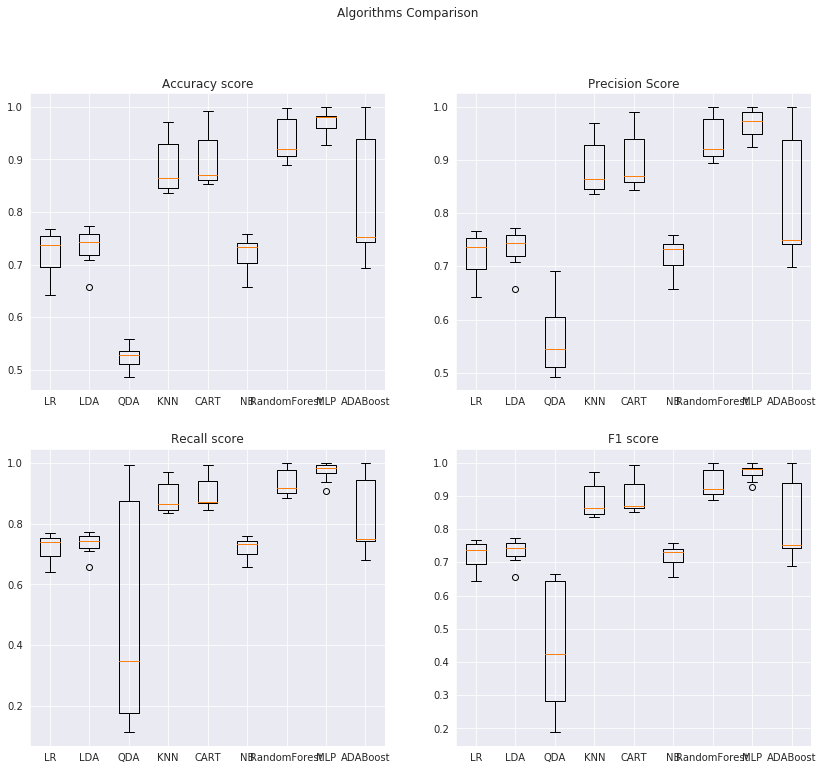

In [69]:
fig = plt.figure(figsize=(14,12))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(221)
plt.boxplot(Accuracy)
plt.title('Accuracy score')
ax.set_xticklabels(names)
ax = fig.add_subplot(222)
plt.boxplot(Precision)
plt.title('Precision Score')
ax.set_xticklabels(names)
ax = fig.add_subplot(223)
plt.boxplot(Recall)
ax.set_xticklabels(names)
plt.title('Recall score')
ax = fig.add_subplot(224)
plt.title('F1 score')
plt.boxplot(F1)
ax.set_xticklabels(names)

plt.show()



We can see clearly that almoust all our models have accuracy, precision, recaal, f1 score that are somewhat descent for a first try. But the neural network model with 100 hidden layers is the most well performing by far, followed by the CART model and followed suprisingly by K nearst neighbour classifiers. Let's see if this same performance is reflected on our test set too.

In [70]:
#now to test
from time import time

X_test = test.drop(columns=['Date','label','EXW', 'EXL', 'PSW', 'PSL', 'B365W', 'B365L'])
Y_test = test['label']

y_pred = []
train_time = []

for name, model in models:
    tic = time()
    model.fit(X, Y)
    toc = time()
    
    y_pred.append(model.predict(X_test))
    train_time.append(toc - tic)
    
    print("Classifier : {} ===> Training duration : {} sec".format(name, train_time[-1]))
    

    

Classifier : LR ===> Training duration : 3.061662435531616 sec
Classifier : LDA ===> Training duration : 7.095736265182495 sec
Classifier : QDA ===> Training duration : 3.7112863063812256 sec
Classifier : KNN ===> Training duration : 11.321804761886597 sec
Classifier : CART ===> Training duration : 3.1645026206970215 sec
Classifier : NB ===> Training duration : 0.6262013912200928 sec
Classifier : RandomForest ===> Training duration : 16.59965181350708 sec
Classifier : MLP ===> Training duration : 813.268869638443 sec
Classifier : ADABoost ===> Training duration : 25.276033639907837 sec


In [71]:
reports = []
metrics = ["Classifier", "Accuracy", "Precision", "Recall", "F1-Score",'Training Duration (seconds)']
for idx, y_clf in enumerate(y_pred):
    acc = accuracy_score(Y_test, y_clf)
    pre = precision_score(Y_test, y_clf)
    rec = recall_score(Y_test, y_clf)
    f1s = f1_score(Y_test, y_clf)
    report = (models[idx][0], acc, pre, rec, f1s,train_time[idx])
    reports.append(report)       
display(pd.DataFrame.from_records(reports, columns=metrics))

,Classifier,Accuracy,Precision,Recall,F1-Score,Training Duration (seconds)
0,LR,0.692441,0.692515,0.692248,0.692382,3.061662
1,LDA,0.693791,0.693791,0.693791,0.693791,7.095736
2,QDA,0.502121,0.501088,0.976861,0.662395,3.711286
3,KNN,0.824142,0.824142,0.824142,0.824142,11.321805
4,CART,0.841111,0.845103,0.835326,0.840186,3.164503
5,NB,0.677594,0.677594,0.677594,0.677594,0.626201
6,RandomForest,0.889125,0.892302,0.885075,0.888674,16.599652
7,MLP,0.980524,0.988627,0.972233,0.980362,813.268870
8,ADABoost,0.686078,0.685506,0.687621,0.686561,25.276034


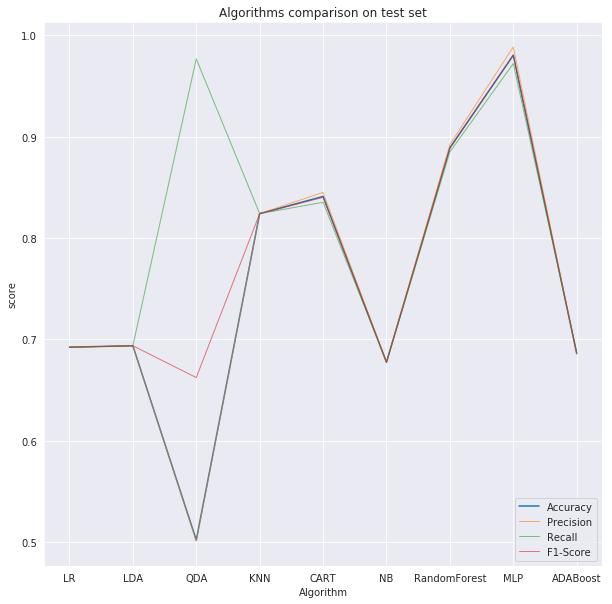

In [72]:
reports = pd.DataFrame.from_records(reports, columns=metrics)
plt.figure(figsize=(10,10))
plt.plot(reports['Classifier'].values, reports['Accuracy'].values,
             label='Accuracy' )
plt.plot(reports['Classifier'], reports['Precision'], lw=1, alpha=0.6,
             label='Precision' )
plt.plot(reports['Classifier'], reports['Recall'], lw=1, alpha=0.6,
             label='Recall' )
plt.plot(reports['Classifier'], reports['F1-Score'], lw=1, alpha=0.6,
             label='F1-Score' )


plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Algorithms comparison on test set')
plt.legend(loc="lower right")
plt.show()

The scores from the cross-validation strategy are almost close to the ones found on the test set. and as we saw in the cross valisation phase We can see clearly that almoust all our models have accuracy, precision, recaal, f1 score that are somewhat descent for a first try. But the neural network model with 100 hidden layers is the most well performing by far, followed by the Random forest and CART models wich are followed by K nearst neighbour classifiers. Let's see if this same performance is reflected on our test set too.

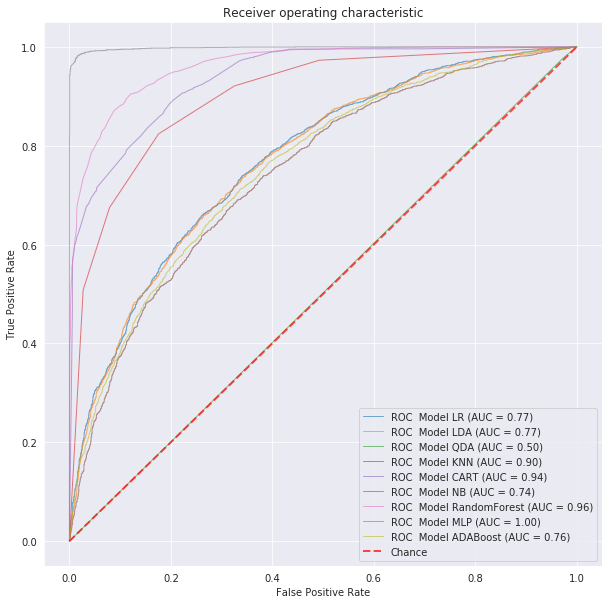

In [73]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

y_prob = []

for name, model in models:
    y_prob.append(model.predict_proba(X_test)[:,1])
    
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
plt.figure(figsize=(10,10))
for idx, y_clf in enumerate(y_prob):
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_test, y_clf)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,
             label='ROC  Model %s (AUC = %0.2f)' % (models[idx][0], roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.7)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

the neural entwork model with 100 hiddens units has the best trade-off between sensitivity (true positive rate) and specificity (1 – false positive rate ) with Area Under ROC Curve close to 1.

# Betting
## Using our model for betting

We will try to assess the return on our investement if you relied on those models for our betting decisions.

In [74]:
betting_columns = ['EXL','EXW','PSL','PSW','B365L','B365W']
#Columns containg the Odds
Betting_Odds =  test[betting_columns]

#Our Capital will be 1500Euros for each strategy and for each betting site for a single model. 
budget_1 = 1500

In [75]:

import random


def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


'''
Simple bettor, betting the same amount each time. This will be our baselane.
'''
def simple_bettor(data,y_true,budget):
    #return on investement for each betting site
    ROI_1 = budget
    ROI_2 = budget
    ROI_3 = budget
    wager = 10

    currentWager = 0

    for i in range(len(data)):
        if rollDice() and y_true.values[i]==1:
            ROI_1 += wager*(data['EXW'].values[i]-1)
            ROI_2 += wager*(data['PSW'].values[i]-1)
            ROI_3 += wager*(data['B365W'].values[i]-1)
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                

        elif rollDice() and y_true.values[i]==0:
            ROI_1 -= wager
            ROI_2 -= wager
            ROI_3 -= wager
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                

        elif not rollDice() and y_true.values[i]==0:
            ROI_1 += wager*(data['EXL'].values[i]-1)
            ROI_2 += wager*(data['PSL'].values[i]-1)
            ROI_3 += wager*(data['B365L'].values[i]-1)
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                

        else :
            ROI_1 -= wager
            ROI_2 -= wager
            ROI_3 -= wager
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                

    if ROI_1<0:
        ROI_1 = 0
    if ROI_2<0:
        ROI_2 = 0
    if ROI_3<0:
        ROI_3 = 0
    return [(ROI_1-budget)/budget,(ROI_2-budget)/budget,(ROI_3-budget)/budget]



#If our model predict that a player is going to win, we'll invest 10Euros on that match for that player winning 
# and compare it with the real value to see if we won or lost

def strategy_1(data,y_pred,y_true,budget):
    '''
    
       If our model predict that a player is going to win, we'll invest 10Euros on that match for that player winning 
       and compare it with the real value to see if we won or lost
       
    '''
    #Retrun on investement for each betting site
    ROI_1 = budget
    ROI_2 = budget
    ROI_3 = budget
    for i in range(0,len(test)):
        if y_pred[i]==1 and y_true.values[i]==1.0:
            ROI_1 += 10*(data['EXW'].values[i]-1)
            ROI_2 += 10*(data['PSW'].values[i]-1)
            ROI_3 += 10*(data['B365W'].values[i]-1)
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                

        elif y_pred[i]==1 and y_true.values[i]==0.0:
            ROI_1 += -10
            ROI_2 += -10
            ROI_3 += -10
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                

        elif y_pred[i]==0 and y_true.values[i] == 1.0:
            #checking if we are already broke
            ROI_1 += -10
            ROI_2 += -10
            ROI_3 += -10
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                

        else :
            ROI_1 += 10*(data['EXL'].values[i]-1)
            ROI_2 += 10*(data['PSL'].values[i]-1)
            ROI_3 += 10*(data['B365L'].values[i]-1)
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                
            
    if ROI_1<0:
        ROI_1 = 0
    if ROI_2<0:
        ROI_2 = 0
    if ROI_3<0:
        ROI_3 = 0
    return [(ROI_1-budget)/budget,(ROI_2-budget)/budget,(ROI_3-budget)/budget]

def strategy_2(data,y_proba,y_true,budget):
    '''
    
      In each match we'll invest 10(probability_player_win)Euros for the player winning, and 10(probability_player_lose)Euros
      for the player losing

    
    '''
    ROI_1 = budget
    ROI_2 = budget
    ROI_3 = budget
    for i in range(0,len(test)):
        if y_true.values[i]==1.0:
            ROI_1 += y_proba[i]*10*(data['EXW'].values[i]-1) -(1- y_proba[i])*10
            ROI_2 += y_proba[i]*10*(data['PSW'].values[i]-1) - (1-y_proba[i])*10
            ROI_3 += y_proba[i]*10*(data['B365W'].values[i]-1) - (1-y_proba[i])*10
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                
        else :
            ROI_1 += (1-y_proba[i])*10*(data['EXL'].values[i]-1) - y_proba[i]*10
            ROI_2 += (1-y_proba[i])*10*(data['PSL'].values[i]-1) - y_proba[i]*10
            ROI_3 += (1-y_proba[i])*10*(data['B365L'].values[i]-1) - y_proba[i]*10
            #checking if we are already broke
            if ROI_1<=0:
                ROI_1 = -100000000000000000000
            if ROI_2<=0:
                ROI_2 = -100000000000000000000
            if ROI_3<=0:
                ROI_3 = -100000000000000000000                

    if ROI_1<0:
        ROI_1 = 0
    if ROI_2<0:
        ROI_2 = 0
    if ROI_3<0:
        ROI_3 = 0
    return [(ROI_1-budget)/budget,(ROI_2-budget)/budget,(ROI_3-budget)/budget]


#P.S: Seing how we contructed the dataset (Each row repeated one time). We'll be actualy investing 20Euros of our capital in each match instead of 10

        

In [76]:
#Our Capital will be 1500Euros for each strategy and for each betting site for a single model. 
reports = []
metrics = ["Classifier",  "Strat 1 EX", "Strat 2 EX", "Strat 1 PS", "Strat 2 PS", "Strat 1 B365", "Strat 2 B365" ,'Random EX', 'Random PS','Random B365']
for idx, y_clf in enumerate(y_pred):
    Random = simple_bettor(Betting_Odds ,Y_test,budget_1)
    strat_1 = strategy_1(Betting_Odds,y_clf,Y_test,budget_1)
    strat_2 = strategy_2(Betting_Odds,y_prob[idx],Y_test,budget_1)
    report = (models[idx][0],strat_1[1],strat_2[1],strat_1[1],strat_2[1],strat_1[2],strat_2[2],Random[0],Random[1],Random[2])
    reports.append(report)       
display(pd.DataFrame.from_records(reports, columns=metrics))

,Classifier,Strat 1 EX,Strat 2 EX,Strat 1 PS,Strat 2 PS,Strat 1 B365,Strat 2 B365,Random EX,Random PS,Random B365
0,LR,5.918000,3.295254,5.918000,3.295254,4.408693,1.809568,-1.0,-1.0,-1.0
1,LDA,6.627800,3.507076,6.627800,3.507076,5.043360,1.979431,-1.0,-1.0,-1.0
2,QDA,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0
3,KNN,17.446467,14.970920,17.446467,14.970920,15.266427,12.855333,-1.0,-1.0,-1.0
4,CART,20.971600,19.477262,20.971600,19.477262,18.426293,16.993307,-1.0,-1.0,-1.0
5,NB,5.365800,3.964977,5.365800,3.964977,3.882293,2.513210,-1.0,-1.0,-1.0
6,RandomForest,24.168400,14.846272,24.168400,14.846272,21.476627,12.618992,-1.0,-1.0,-1.0
7,MLP,30.676467,30.350761,30.676467,30.350761,27.698293,27.387214,-1.0,-1.0,-1.0
8,ADABoost,6.526533,-1.000000,6.526533,-1.000000,4.981427,-1.000000,-1.0,-1.0,-1.0


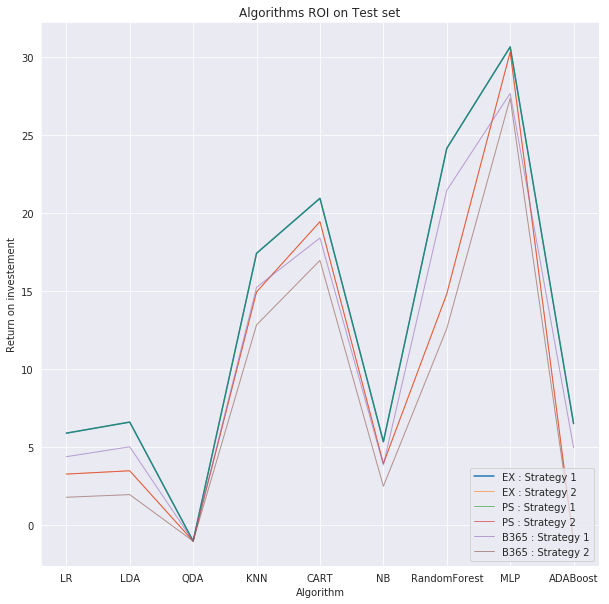

In [77]:
reports = pd.DataFrame.from_records(reports, columns=metrics)
plt.figure(figsize=(10,10))
plt.plot(reports['Classifier'].values, reports['Strat 1 EX'].values,
             label='EX : Strategy 1' )
plt.plot(reports['Classifier'], reports['Strat 2 EX'], lw=1, alpha=0.6,
             label='EX : Strategy 2' )
plt.plot(reports['Classifier'], reports['Strat 1 PS'], lw=1, alpha=0.6,
             label='PS : Strategy 1' )
plt.plot(reports['Classifier'], reports['Strat 2 PS'], lw=1, alpha=0.6,
             label='PS : Strategy 2' )
plt.plot(reports['Classifier'], reports['Strat 1 B365'], lw=1, alpha=0.6,
             label='B365 : Strategy 1' )
plt.plot(reports['Classifier'], reports['Strat 2 B365'], lw=1, alpha=0.6,
             label='B365 : Strategy 2' )


plt.xlabel('Algorithm')
plt.ylabel('Return on investement')
plt.title('Algorithms ROI on Test set')
plt.legend(loc="lower right")
plt.show()

The strategy number one on the EX betting site is always the most profitable for all our model. But, Only with the neural network model and the Decision tree and Random forest models we can achieve a return on investment of 30% and 25% repectivly with a Capital of 1500Euros and a 20Euros investement per match.

### Further Improvements

- Hyper-parameters tuning for these models.
- Using a generative Modeling approach (Markov chain).

- Trying more discriminative models : SVM, XGBOOST.

- Modeling Fatigue of players.
- Using external Data about injuries.

- More features engineering (hand-crafted features).
- Doing more extensive EDA

- Changing the Encodings of our categorical variables.



I did not train an SVM model on this dataset as it takes too much times to train taking into account the number of columns in the training data and the considerable number of rows.